# Importing packages


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.ensemble import BaggingClassifier, VotingClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, make_scorer
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


# Loading the dataset


In [ ]:
df = pd.read_csv('./Crop_recommendation.csv')

# Analyzing imported data


In [ ]:
df #show the complete data set

In [ ]:
print("Shape of the dataframe: ",df.shape) #number of rows and columes
df.isna().sum() #detect presence of a missing value in each column

In [ ]:
df.info() #gives information about the num of non null cols, data type in each col and memory usage

# Summary Statistics

In [ ]:
df.describe() #caluculates the count, mean, standard deviation, min and max values and percentals of each col or attribute

In [ ]:
df.dtypes #shows the datatypes of the various cols

# Exploratory Data Analysis

In [ ]:
#getting the data visualization of the col nitrogen using seabon function displot
sns.displot(x=df['N'], bins=20,kde=True,edgecolor="black",color='black',facecolor='#337dff')
plt.title("Nitrogen",size=20)
plt.show()

In [ ]:
sns.displot(x=df['P'],bins=20,color='black',edgecolor='black',kde=True,facecolor='#337dff')
plt.title("Phosphorus", size=20)
plt.xticks(range(0,150,20))
plt.show()

In [ ]:
sns.displot(x=df['K'],kde=True, bins=20, facecolor='#337DFF',edgecolor='black', color='black')
plt.title("Potassium",size=20)
plt.show()

In [ ]:
sns.displot(x=df['temperature'], bins=20,kde=True,edgecolor="black",color='black',facecolor='#337DFF')
plt.title("Temperature",size=20)
plt.show()

In [ ]:
sns.displot(x=df['humidity'], color='black',facecolor='#337DFF',kde=True,edgecolor='black')
plt.title("Humidity",size=20)
plt.show()

In [ ]:
sns.displot(x=df['rainfall'], color='black',facecolor='#337DFF',kde=True,edgecolor='black')
plt.title("Rainfall",size=20)
plt.show()

In [ ]:
#plotting the effect of temperature and rainfall on all the crops
sns.relplot(x='rainfall',y='temperature',data=df, kind='scatter', hue='label', height=5)
plt.show()

In [ ]:
#plotting the effect of ph and temperatureq on all the crops
sns.relplot(x='ph',y='temperature',data=df, kind='scatter', hue='label', height=5)
plt.show()

In [ ]:
#using pair plot to show the relationship between pairs of attributes 
sns.pairplot(data=df,hue='label')
plt.show()

In [ ]:
# Unique values in the label column
crops = df['label'].unique() #get us the different or unique crops
print(crops)
# print(len(crops)) #print the total size
# print(crops) #print the crops
print(pd.value_counts(df['label'])) #for each unique crop count the number of  data we got on that crop

In [ ]:
# Filtering each unique label and store it in a list df2 for to plot the box plot

df2=[]
for i in crops:
    df2.append(df[df['label'] == i]) #i.e making a list that contain unique crops in different list
df2[20].head() #printing the first 5 list of the second set of crop

In [ ]:
df.duplicated().any() #checking for duplicate

In [ ]:
#expected heatmap when we run the data colums against themselves
plt.figure(figsize=(12,8)) #create a 12x8 plot 
sns.heatmap(df.corr(),annot=True)
plt.xlabel("Original")
plt.ylabel("Predicted")
plt.show()

In [ ]:
# Create a dot plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='temperature', y='label', hue='rainfall', s=100)

plt.title('Dot Plot of Temperature vs. Crop with Rainfall')
plt.xlabel('Temperature')
plt.ylabel('Crop')
plt.legend()

plt.show()

In [ ]:
# Create a dot plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='temperature', y='label', hue='humidity', s=100)

plt.title('Dot Plot of Temperature vs. Crop with Humidity')
plt.xlabel('Temperature')
plt.ylabel('Crop')
plt.legend()

plt.show()

In [ ]:
# Create a dot plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='temperature', y='label', hue='ph', s=100)

plt.title('Dot Plot of Temperature vs. Crop with pH')
plt.xlabel('Temperature')
plt.ylabel('Crop')
plt.legend()

plt.show()

In [ ]:
#how crops responds to varied temperatures using box plot to visualize the min, max, lower, median, upper quartiles
sns.catplot(data=df, x='label', y='temperature', kind='box', height=10, aspect=20/8.27)
# plt.xticks(rotation='vertical')
plt.title("Temperature", size=20)
plt.show()

In [ ]:
#box plot of how the crops respond to humidity
sns.catplot(data=df, x='label', y='humidity', kind='box', height=10, aspect=20/8.27)
# plt.xticks(rotation='vertical')
plt.title("Humidity", size=20)
plt.show()

In [ ]:
#visuals of how the crops responded to Nitrogen
sns.catplot(data=df, x='label', y='N', kind='box', height=10, aspect=20/8.27)
plt.title("Nitrogen", size=20)
# plt.xticks(rotation='vertical')
plt.show()

In [ ]:
#How the crops responded to sality of the soil (PH)
sns.catplot(data=df, x='label', y='ph', kind='box', height=10, aspect=20/8.27)
# plt.xticks(rotation='vertical')
plt.title("PH",size=20)
plt.show()

In [ ]:
sns.catplot(data=df, x='label', y='P', kind='box', height=10, aspect=20/8.27)
# plt.xticks(rotation='vertical')
plt.title("Phosphorus",size=20)
plt.show()

In [ ]:
#how crops responded to Potassium
sns.catplot(data=df, x='label', y='K', kind='box', height=10, aspect=20/8.27)
# plt.xticks(rotation='vertical')
plt.title("Potassium",size=20)
plt.show()

# PREPROCESSING 

## Outlier detection

In [ ]:
def detect_outlier(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (1.5*IQR) #Lower limit = (class boundary or class midpoint) - (half the width of the interval)
    upper_limit = q3 + (1.5*IQR) #Upper limit = (class boundary or class midpoint) + (half the width of the interval)
    print(f"Lower limit: {lower_limit} Upper limit: {upper_limit}")
    print(f"Minimum value: {x.min()}   MAximum Value: {x.max()}")
    for i in [x.min(),x.max()]:
        if i == x.min():
            if lower_limit > x.min():
                print("Lower limit failed - Need to remove minimum value")
            elif lower_limit < x.min():
                print("Lower limit passed - No need to remove outlier")
        elif i == x.max():
            if upper_limit > x.max():
                print("Upper limit passed - No need to remove outlier")
            elif upper_limit < x.max():
                print("Upper limit failed - Need to remove maximum value")


In [ ]:
#finding if outliers exist in grapes             
detect_outlier(df['K'][df['label']=='grapes']) 

In [ ]:
#checking if outliers exist for crops due to Potassium
for i in df['label'].unique():
    detect_outlier(df['K'][df['label']==i])
    print('---------------------------------------------')

# FEATURE EXTRACTION

In [ ]:
X = df.drop(['label'], axis=1) # our independent variable; removing the label as part of our data and saving the rest as x
Y= df['label'] #our dependent variable

In [ ]:
X.head() #print the first 5 to confirm

In [ ]:
Y.unique() #prints the different crops or target varaibles

In [ ]:
print("Label length of independent variable: ",len(X)) #total X

In [ ]:
print("Label length of dependent or target variable: ",len(Y)) #total y

## Finding duplicates

In [ ]:
df.duplicated().any() #checking for duplicate

## Normalizing data

In [ ]:
#ENCODING CATEGORICAL DATA BECAUSE NOT ALL MACHINE LEARNING MODULE CAN HANDLE THAT 
#also for mathematical calculations, use the ecoded, whenever i need the categorical i will transform it 
encode = preprocessing.LabelEncoder() #creating an object or instance of LabelEncoder that will help us encode categorical variables into numerical variables
y = encode.fit_transform(Y) #transforming a categorical variable Y into numerical values and storing the result in a variable y
print(y) 

## Spliting data into training and testing sets

In [ ]:
#using the train_test_split function from the model_selection module in scikit-learn to split the dataset x and y into training and testing sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,Y, test_size=0.25, random_state=42) #default split parameters
print("the length of x train and test are: ", len(X_train),len(X_test), "\nThe length of the y_train and y_test are: ", len(X_test),len(y_test))

# Model Selection and Configurations for Hyperparameter Tuning

In [ ]:
#defining a grid 
models={
    'decision tree' : {
        'model' : DecisionTreeClassifier(criterion='gini'),
        'params': {
            'decisiontreeclassifier__splitter':['best','random']
        }
    },
    
    
    'svm': {
        'model': SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    
   'k classifier':{
       'model':KNeighborsClassifier(),
       'params':{
           'kneighborsclassifier__n_neighbors':[5,10,20,25],
           'kneighborsclassifier__weights':['uniform','distance']
       }
   }
}

## Performing Hyperparameter Tuning and Model Evaluation Pipeline

In [ ]:
# Define classification-specific scoring metrics
scoring = {
    'Accuracy': make_scorer(accuracy_score),  # Scoring metric for accuracy
    'Precision': make_scorer(precision_score, average='weighted'),  # Scoring metric for precision
    'Recall': make_scorer(recall_score, average='weighted'),  # Scoring metric for recall
    'F1-Score': make_scorer(f1_score, average='weighted'),  # Scoring metric for F1-score
}

# Lists to store results
results = []  # Store metrics for each model
details = []  # Store details of hyperparameter search for each model
best_estimators = {}  # Store the best estimators for each model

# Loop through each model configuration
for model_name, config in models.items():
    # Create a pipeline that includes data preprocessing and the specified model
    pipeline = make_pipeline(preprocessing.StandardScaler(), config['model'])

    # Perform hyperparameter tuning using GridSearchCV
    grid_search = model_selection.GridSearchCV(
        pipeline, config['params'], cv=5, scoring=scoring, refit='Accuracy'  # Cross-validation with specified metrics
    )
    
    # Fit the grid search to the training data
    grid_search.fit(X_train, y_train)  

    # Perform nested cross-validation on trained grid_search
    nested_scores = model_selection.cross_validate(
        grid_search, X_train, y_train, cv=5, scoring=scoring  # Nested cross-validation for evaluating the model
    )

    # Store results for the current model configuration
    results.append({
        'Model': model_name,
        'Best Accuracy': grid_search.best_score_,  # Best accuracy achieved during hyperparameter tuning
        'Best Params': grid_search.best_params_,  # Best hyperparameters found during tuning
        'Accuracy': nested_scores['test_Accuracy'].mean(),  # Average accuracy across cross-validation folds
        'Precision': nested_scores['test_Precision'].mean(),  # Average precision across cross-validation folds
        'Recall': nested_scores['test_Recall'].mean(),  # Average recall across cross-validation folds
        'F1-Score': nested_scores['test_F1-Score'].mean(),  # Average F1-score across cross-validation folds

    })
    

    details.append(pd.DataFrame(grid_search.cv_results_))  # Store details of hyperparameter search
    best_estimators[model_name] = grid_search.best_estimator_  # Store the best estimator found

# Create a DataFrame to display the results
result_df = pd.DataFrame(results)
# Print the results
result_df


In [ ]:
details[0] #checking the details of the best performing machine learning model

In [ ]:
details[1]

In [ ]:
details[2]

In [ ]:
details[3]

In [ ]:
results #print the whole score 

In [ ]:
pd.DataFrame(results) #creating a datafram for score

## True accuracy 

In [ ]:
#printing the results using the key
for i in best_estimators.keys():
    print(f'{i} : {best_estimators[i].score(X_test,y_test)}')

PREDICTION WITH BEST MODEL

In [ ]:
#use the best machine learning model to predict our text data
y_pred = best_estimators['random_forest'].predict(X_test)

CLASSIFICATION REPORT

In [ ]:
#inverse transform from numerical data to categorical data to see the crops and not their numerical representation
print(classification_report(encode.inverse_transform(y_test), encode.inverse_transform(y_pred)))

CONFUSION MATRIX OF BEST MODEL

In [ ]:
#constructing a confusion matrix of the y_test and predicted
plt.figure(figsize=(12,8)) #create a 12x8 plot 
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True) #generate a heatmap of the created confusion matrix of the y_test and the predict
plt.xlabel("Original")
plt.ylabel("Predicted")
plt.show()

ROC AUC

In [ ]:
# Predict class probabilities using predict_proba
y_probs = best_estimators['random_forest'].predict_proba(X_test)

# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=range(20))

# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range((20)):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
for i in range(20):
    plt.plot(fpr[i], tpr[i], label='Class {}: AUC = {:.2f}'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


PREDICTION

In [ ]:
# data = pd.DataFrame([[N, P, K, temperature, humidity, ph, rainfall]], columns=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'])
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]]) 
yP = grid_search.predict(data)
encode.inverse_transform(yP)

# USING AN ENSEMBLE FOR MORE ACCURACY

## BAGGING OR BOOSTRAP AGGREGATING CLASSIFIER

Base Models: Bagging involves training multiple instances of the same base model on different subsets of the training data. Each instance is trained on a randomly sampled subset with replacement (bootstrap samples).

Parallelism: The base models in bagging are trained in parallel, which makes it suitable for parallel computing environments.

Aggregation: For classification problems, bagging aggregates the predictions using majority voting (mode of class labels). For regression problems, it aggregates the predictions using the mean (average) of individual model predictions.

Example Algorithms: Random Forest is a popular bagging algorithm that uses decision trees as base models. Each tree is trained on a different subset of the data.

Purpose: Bagging reduces variance and overfitting by combining predictions from multiple models trained on diverse subsets of the data.

# Creating and Training a Bagging Classifier Ensemble with Random Forest Base Estimators

In [53]:
#creating a pipeline with make_pipeline to chain together multiple data preprocising
#StandardScalr()  standardizes the input data by subtracting the mean and scaling to unit variance
#RandomForestClassifier is a machine learning model that constructs multiple decision trees on randomly selected subsets of the training data and aggregates their predictions to make a final prediction
pipe1 = make_pipeline(preprocessing.StandardScaler(), RandomForestClassifier(n_estimators = 10)) #

# BaggingClassifier trains multiple instances of a base estimator (such as a decision tree, k-nearest neighbors, or logistic regression) on different subsets of the training data and aggregates their predictions to make a final prediction.
bag_model = BaggingClassifier(base_estimator=pipe1,n_estimators=100,
                              oob_score=True,random_state=0, max_samples=0.8)

#repeated this because i am not using svm or knn, and bagging can handle categorical data
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,Y, test_size=0.25, random_state=42) #default split parameters

bag_model.fit(X_train,y_train) #training the module

BaggingClassifier(base_estimator=Pipeline(steps=[('standardscaler',
                                                  StandardScaler()),
                                                 ('randomforestclassifier',
                                                  RandomForestClassifier(n_estimators=10))]),
                  max_samples=0.8, n_estimators=100, oob_score=True,
                  random_state=0)

In [54]:
y_pred_bg = bag_model.predict(X_test) #would generate predicted labels for the test data x_test using the BaggingClassifier model that was trained earlier.

In [55]:
#calculating the score
bg_score = bag_model.score(X_test, y_test) #bag_model.score(x_test,y_test) would calculate the mean accuracy of the BaggingClassifier model on the test data x_test and y_test
bg_score

0.9890909090909091

In [56]:
#calculating the score
bg_score = accuracy_score(y_test, y_pred_bg) #bag_model.score(x_test,y_test) would calculate the mean accuracy of the BaggingClassifier model on the test data x_test and y_test
bg_score

0.9890909090909091

CLASSIFICATION REPORT BAGGING

In [57]:
#inverse transform from numerical data to categorical data to see the crops and not their numerical representation
print(classification_report((y_test), (y_pred_bg)))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        29
      banana       1.00      1.00      1.00        23
   blackgram       1.00      1.00      1.00        24
    chickpea       1.00      1.00      1.00        31
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        26
      cotton       1.00      1.00      1.00        21
      grapes       1.00      1.00      1.00        19
        jute       0.82      1.00      0.90        27
 kidneybeans       1.00      1.00      1.00        24
      lentil       1.00      1.00      1.00        15
       maize       1.00      1.00      1.00        23
       mango       1.00      1.00      1.00        27
   mothbeans       1.00      1.00      1.00        26
    mungbean       1.00      1.00      1.00        26
   muskmelon       1.00      1.00      1.00        22
      orange       1.00      1.00      1.00        19
      papaya       1.00    

CONFUSION MATRIX FOR BAGGING

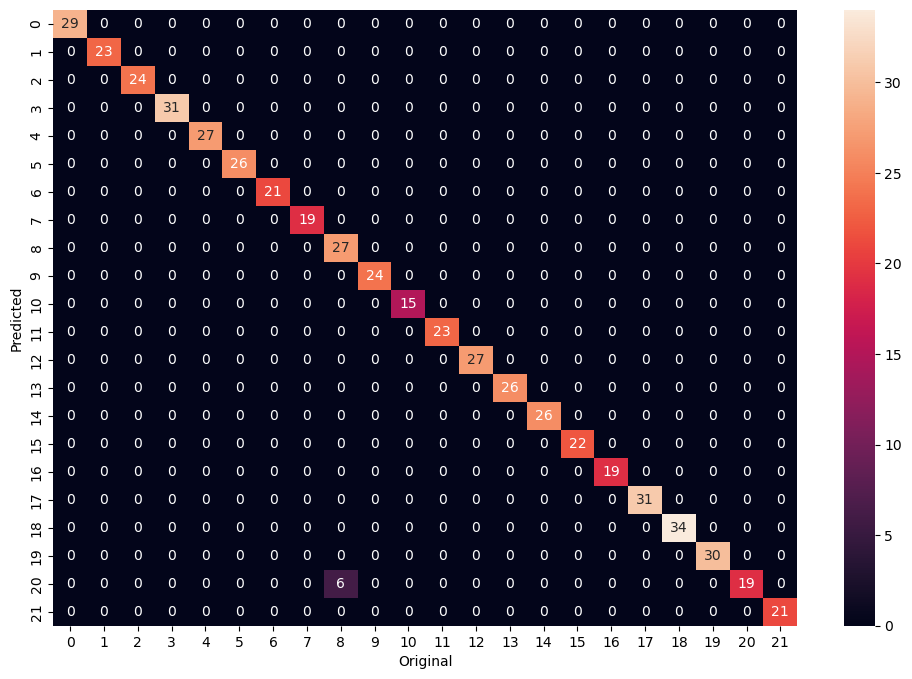

In [58]:
#constructing a confusion matrix of the y_test and predicted
plt.figure(figsize=(12,8)) #create a 12x8 plot 
sns.heatmap(confusion_matrix((y_test), (y_pred_bg)),annot=True) #generate a heatmap of the created confusion matrix of the y_test and the predict
plt.xlabel("Original")
plt.ylabel("Predicted")
plt.show()

ROC AUC BAGGING

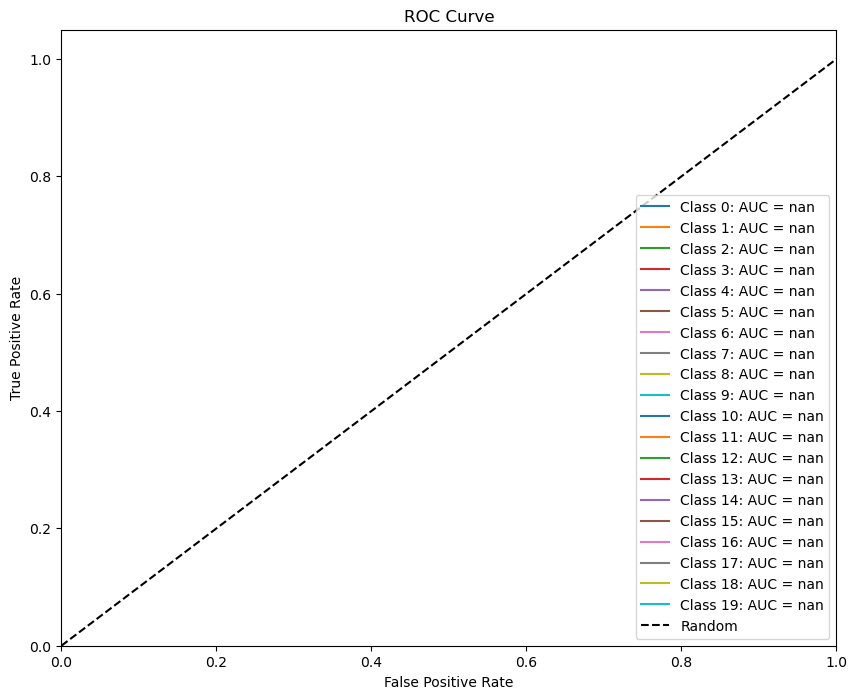

In [59]:
# Predict class probabilities using predict_proba
y_probs_bg = bag_model.predict_proba(X_test)

# Binarize the labels
y_test_binarized_bg = label_binarize(y_test, classes=range(20))

# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range((20)):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized_bg[:, i], y_probs_bg[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
for i in range(20):
    plt.plot(fpr[i], tpr[i], label='Class {}: AUC = {:.2f}'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


PREDICTION 

In [60]:
# data = pd.DataFrame([[N, P, K, temperature, humidity, ph, rainfall]], columns=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'])
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]]) 
yP = bag_model.predict(data)
# encode.inverse_transform(yP)
yP

array(['coffee'], dtype=object)

In [61]:
#final score of bagging classifier

In [62]:
accuracy = accuracy_score(y_test, y_pred_bg)
accuracy

0.9890909090909091

## VOTING CLASSIFIER 

Base Models: Voting involves training multiple different base models on the same training data.

Combination: In classification problems, a voting classifier combines the predictions of its individual base models to make the final prediction. It can use different strategies, such as majority voting (hard voting) or weighted average of class probabilities (soft voting).

Example Algorithms: A voting classifier can combine predictions from diverse algorithms, such as Decision Trees, Support Vector Machines (SVM), and k-Nearest Neighbors (k-NN).

Purpose: Voting is used to improve generalization and robustness by combining predictions from different models that may have complementary strengths.

When using "hard" voting, the final prediction is based on the majority class predicted by the base models. When using "soft" voting, the final prediction is based on the class probabilities (confidence) predicted by the base models.

## Creating and Training a Voting Classifier Ensemble for Multiple Classification Algorithms

In [63]:
# Define individual classifiers
clf1 = DecisionTreeClassifier(criterion='gini', splitter='best')
clf2 = SVC(gamma='auto', kernel='rbf', probability=True)
clf3 = RandomForestClassifier(n_estimators=10)
clf4 = KNeighborsClassifier()

# Create the voting classifier
voting_clf = VotingClassifier(
    estimators=[('dt', clf1), ('svm', clf2), ('rf', clf3), ('knn', clf4)],
    voting='soft'  # Use majority voting
)

# Train the voting classifier
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                             ('svm', SVC(gamma='auto', probability=True)),
                             ('rf', RandomForestClassifier(n_estimators=10)),
                             ('knn', KNeighborsClassifier())],
                 voting='soft')

In [64]:
# Evaluate the voting classifier
vc_score = voting_clf.score(X_test, y_test)

In [65]:
# Make predictions using the voting classifier
y_predicted_vclf = voting_clf.predict(X_test)

In [66]:
print("Voting Classifier Score:", vc_score)


Voting Classifier Score: 0.9854545454545455


CLASSIFICATION REPORT

In [67]:
# Print the classification report
print(classification_report(y_test, y_predicted_vclf))
# print(classification_report(encode.inverse_transform(y_test), encode.inverse_transform(y_predicted_vclf)))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        29
      banana       1.00      1.00      1.00        23
   blackgram       1.00      1.00      1.00        24
    chickpea       1.00      1.00      1.00        31
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        26
      cotton       1.00      1.00      1.00        21
      grapes       1.00      1.00      1.00        19
        jute       0.83      0.93      0.88        27
 kidneybeans       1.00      1.00      1.00        24
      lentil       0.94      1.00      0.97        15
       maize       1.00      1.00      1.00        23
       mango       1.00      1.00      1.00        27
   mothbeans       1.00      0.96      0.98        26
    mungbean       1.00      1.00      1.00        26
   muskmelon       1.00      1.00      1.00        22
      orange       1.00      1.00      1.00        19
      papaya       1.00    

CONFUSION MATRIX

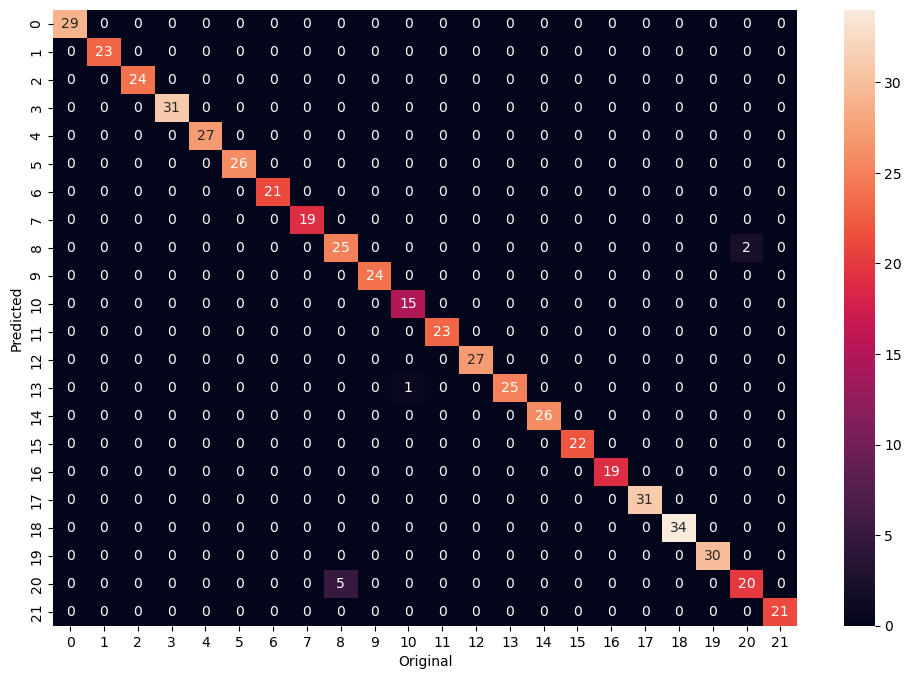

In [68]:
#constructing a confusion matrix of the y_test and predicted
plt.figure(figsize=(12,8)) #create a 12x8 plot 
sns.heatmap(confusion_matrix(y_test, y_predicted_vclf),annot=True) #generate a heatmap of the created confusion matrix of the y_test and the predict
plt.xlabel("Original")
plt.ylabel("Predicted")
plt.show()

ROC AUC

In [ ]:
#encode Y before running this code

In [ ]:
## Predict class probabilities using predict_proba
y_probs_vclf = voting_clf.predict_proba(X_test)

# Binarize the labels
y_test_binarized_vclf = label_binarize(y_test, classes=range(20))

# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range((20)):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized_vclf[:, i], y_probs_vclf[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
for i in range(20):
    plt.plot(fpr[i], tpr[i], label='Class {}: AUC = {:.2f}'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


PREDICTION

In [70]:
# data = pd.DataFrame([[N, P, K, temperature, humidity, ph, rainfall]], columns=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'])
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]]) 
yP = voting_clf.predict(data)
# encode.inverse_transform(yP)
yP

array(['coffee'], dtype=object)

## SAVING THE TRAINED MODEL 

In [ ]:
from joblib import dump
dump(bag_model, 'bagging_classifier.joblib')

# y_test_enc = encode.fit_transform(y_test)

np.save('y_test', y_test)
np.save('X_test', X_test)
print(len(y_test))
print(len(y_test))

In [ ]:
import pickle
with open('X_test.pk1', 'wb') as f:
    pickle.dump(X_test, f)
    
with open('y_test.pk1', 'wb') as f:
    pickle.dump(y_test, f)

## TESTING OUR RECOMMENDER SYSTEM DIRECTLY 

## using input from user

In [ ]:
import numpy as np
import pandas as pd

# get input data from the user
N = float(input("Enter the value of N: "))
P = float(input("Enter the value of P: "))
K = float(input("Enter the value of K: "))
temperature = float(input("Enter the temperature: "))
humidity = float(input("Enter the humidity: "))
ph = float(input("Enter the pH level: "))
rainfall = float(input("Enter the rainfall: "))

# create a DataFrame with the user input and set the column names
data = pd.DataFrame([[N, P, K, temperature, humidity, ph, rainfall]], columns=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'])

# make a prediction using the input data
prediction = bag_model.predict(data)

# decoded_data = encode.inverse_transform(prediction)


# print the prediction
print('The recommended crop to be grown is: ', prediction)

#### series of predictions hard coded

In [71]:
data = np.array([[89,67, 30, 43, 60, 5, 80]]) #so we will create a input field to take the data
prediction = bag_model.predict(data) #call our preferred trained module
print(prediction)

['maize']


In [72]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]]) #so we will create a input field to take the data
prediction = bag_model.predict(data) #call our preferred trained module
print(prediction)

['coffee']


In [73]:
data = np.array([[30,3, 40, 40, 70.3, 3, 70]]) #so we will create a input field to take the data
prediction = bag_model.predict(data) #call our preferred trained module
#convert it back to categorical
# print(encode.inverse_transform(prediction)) #output field to print back our data
prediction

array(['mango'], dtype=object)

In [74]:
data = np.array([[60,70, 40, 40, 70.3, 3, 70]]) #so we will create a input field to take the data
prediction = bag_model.predict(data) #call our preferred trained module
print(prediction) #output field to print back our data

['banana']


In [75]:
data = np.array([[99,34, 32, 90, 90, 32, 34]]) #so we will create a input field to take the data
prediction = bag_model.predict(data) #call our preferred trained module
print(prediction) #output field to print back our data

['muskmelon']


In [76]:
data = np.array([[34,4, 34, 3, 3, 3, 5]]) #so we will create a input field to take the data
prediction = bag_model.predict(data) #call our preferred trained module
print(prediction) #output field to print back our data

['kidneybeans']


## predicting using the save trained model which will be used in a application

In [77]:
from joblib import load

bag_model_saved = load('bagging_classifier.joblib')


In [ ]:
# get input data from the user
N = float(input("Enter the value of N: "))
P = float(input("Enter the value of P: "))
K = float(input("Enter the value of K: "))
temperature = float(input("Enter the temperature: "))
humidity = float(input("Enter the humidity: "))
ph = float(input("Enter the pH level: "))
rainfall = float(input("Enter the rainfall: "))

# create a DataFrame with the user input and set the column names
data = pd.DataFrame([[N, P, K, temperature, humidity, ph, rainfall]], columns=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'])

# make a prediction using the input data
prediction = bag_model_saved.predict(data)

# print the prediction
# print(encode.inverse_transform(prediction))
prediction

## series of prediction on the tranined model

In [78]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]]) #so we will create a input field to take the data
prediction = bag_model_saved.predict(data) #call our preferred trained module
print(prediction) 

data = np.array([[30,3, 40, 40, 70.3, 3, 70]]) #so we will create a input field to take the data
prediction = bag_model_saved.predict(data) #call our preferred trained module
print(prediction) #output field to print back our data

data = np.array([[60,70, 40, 40, 70.3, 3, 70]]) #so we will create a input field to take the data
prediction = bag_model_saved.predict(data) #call our preferred trained module
print(prediction) #output field to print back our data

data = np.array([[99,34, 32, 90, 90, 32, 34]]) #so we will create a input field to take the data
prediction = bag_model_saved.predict(data) #call our preferred trained module
print(prediction) #output field to print back our data

data = np.array([[34,4, 34, 3, 3, 3, 5]]) #so we will create a input field to take the data
prediction = bag_model_saved.predict(data) #call our preferred trained module
print(prediction) #output field to print back our data

data = np.array([[34,4, 34, 3, 33, 18, 34]]) #so we will create a input field to take the data
prediction = bag_model_saved.predict(data) #call our preferred trained module
print(prediction)

['coffee']
['mango']
['banana']
['muskmelon']
['kidneybeans']
['mothbeans']
